# Импорт библиотек

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from sklearn.datasets import load_boston
boston = load_boston()

## Загрузка данных

Препроцессинг такой же, как и для занятия по ансамблированию

In [13]:
train = pd.read_csv('house-prices-train.csv')
test = pd.read_csv('house-prices-test.csv')

In [14]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
train_ID = train['Id']
test_ID = test['Id']

#Дропнем колонку Id, предварительно её сохранив
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [17]:
print("Размер тренировочного датасета : {} ".format(train.shape))
print("Размер тестового датасета : {} ".format(test.shape))

Размер тренировочного датасета : (1460, 80) 
Размер тестового датасета : (1459, 79) 


## Объединим train и test выборки

In [18]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Размер итоговой выборки : {}".format(all_data.shape))

Размер итоговой выборки : (2919, 79)


## Посмотрим на пропущенные данные

In [19]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Процент пропусков по признакам')

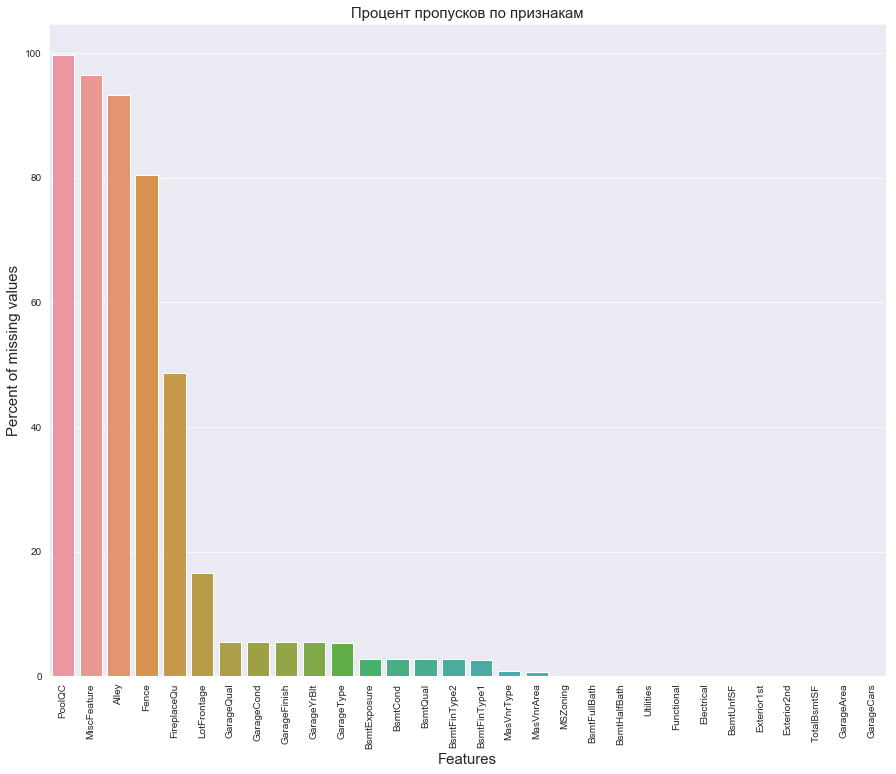

In [20]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Процент пропусков по признакам', fontsize=15)

### Коррелограмма

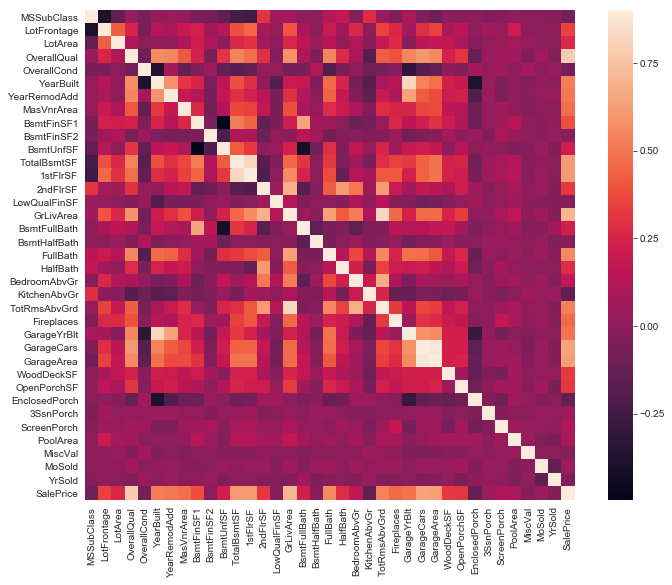

In [21]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Заполнение пропущенных значений

Колонка PoolQC - пропущенное значение = отсутствие бассейна

In [22]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

Колонка MiscFeature - пропущенное значение = отсутствуют дополнительные особенности

In [23]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Колонка Alley - пропущенное значение = отсутствие доступа к переулку

In [24]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Колонка Fence - пропущенное значение = отсутствие забора

In [25]:
all_data["Fence"] = all_data["Fence"].fillna("None")

Колонка FireplaceQu - пропущенное значение = отсутствие камина

In [26]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

В каждом районе размер улицы, соприкасающейся с участком примерно одинаков => заполняем медианой по району

In [27]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

Аналогично заполняем пропущенные значения для признаков гаража

In [28]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [29]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath и BsmtHalfBath : пропущенные значения = нет подвала

In [30]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

и для категориальных признаков

In [31]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

Пропущенное значение = нет каменной облицовки

In [32]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

Классификация зданий - отсутствующие признаки можно заполнить модой

In [33]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

Убираем этот признак, так как в тренировочном датасете встречается только признак AllPub

In [34]:
all_data['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [35]:
all_data = all_data.drop(['Utilities'], axis=1)

В описании датасета говорится, что NaN = обычный дом

In [36]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical : колонка имеет только один пропуск => заполним его модой

In [37]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

Аналогично с признаком KitchenQual

In [38]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

Exterior1st и Exterior2nd аналогично заполняем модой (т.к. только одно пропущенное значение)

In [39]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

Аналогично SaleType

In [40]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

MSSubClass : Na - нет класса строительства => заполним его как 'None'

In [41]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Проверим, остались ли пропуски:

In [42]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Пропусков не осталось

## Feature engineering

Преобразуем численные данные, которые на самом деле такими не являются, в категориальные

In [43]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Сделаем Label Encoding тех признаков, в которых можно подразумевать определенный порядок

In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Размер all_data: {}'.format(all_data.shape))

Размер all_data: (2919, 78)


Добавим новый признак "Общая площадь (1 этаж + 2 этаж + подвал)"

In [45]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Некоторые фичи имеют распределение, отличное от нормального, а, следовательно, смещение

In [46]:
from scipy import stats
from scipy.stats import norm, skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


Для приведения признаков к "нормальному" распределению применяем метод Бокса-Кокса

In [47]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


Делаем OneHotEncoding для всех категориальных фичей

In [48]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


Разбиваем данные на новый train-test

In [49]:
train = all_data[:ntrain]
test = all_data[ntrain:]


 mu = 12.02 and sigma = 0.40



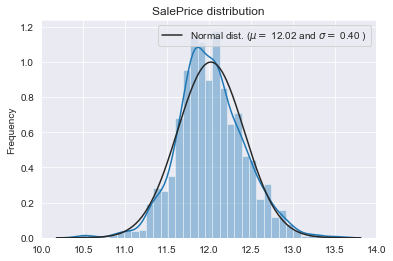

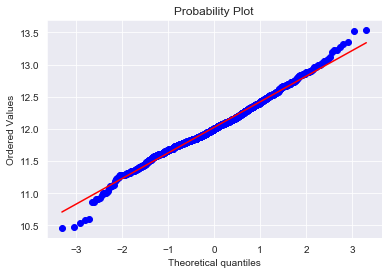

In [50]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = np.log1p(y_train)

#Check the new distribution 
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [51]:
from sklearn.model_selection import KFold, cross_val_score
# Функция валидации
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    # Метрика соревнования (корень из neg MSE)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Моделирование

Алгоритмы:

Ridge Regression
Support Vector Regression
Nearest Neighbors Regression
Random Forest Regression
Gradient Boosting Regression

In [52]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Ridge Regression

In [53]:
lr = Ridge()
lr_alpha = ['0.001', '0.01', '0.1', '1', '10']
lr_parameters = {'solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'), 'alpha':lr_alpha}
clf_lr = GridSearchCV(lr, lr_parameters, scoring="neg_mean_squared_error", cv=10)
clf_lr.fit(train.values, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'solver': ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'), 'alpha': ['0.001', '0.01', '0.1', '1', '10']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [54]:
clf_lr.best_estimator_

Ridge(alpha='10', copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='svd', tol=0.001)

In [55]:
lr_score = rmsle_cv(clf_lr.best_estimator_)
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(lr_score.mean(), lr_score.std()))


Ridge Regression score: 0.1259 (0.0230)



## Support Vector Regression

In [56]:
svr = SVR(gamma="scale")
svr_parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[i for i in range(1, 3)]}
clf_svr = GridSearchCV(svr, svr_parameters, scoring="neg_mean_squared_error", cv=10)
clf_svr.fit(train.values, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [57]:
clf_svr.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
svr_score = rmsle_cv(clf_svr.best_estimator_)
print("\nSupport Vector Regression score: {:.4f} ({:.4f})\n".format(svr_score.mean(), svr_score.std()))


Support Vector Regression score: 0.1347 (0.0244)



## K Neighbors Regressor

In [59]:
knn = KNeighborsRegressor()
n_iter_search = 25
knn_parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[i for i in range(1, 20)], 'p':[1, 2, 3]}
clf_knn = RandomizedSearchCV(knn, knn_parameters, n_iter=n_iter_search, scoring="neg_mean_squared_error", cv=10)
clf_knn.fit(train.values, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
          fit_params=None, iid='warn', n_iter=25, n_jobs=None,
          param_distributions={'weights': ('uniform', 'distance'), 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'p': [1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [60]:
clf_knn.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=1,
          weights='distance')

In [61]:
knn_score = rmsle_cv(clf_knn.best_estimator_)
print("\nK Neighbors Regression score: {:.4f} ({:.4f})\n".format(knn_score.mean(), knn_score.std()))


K Neighbors Regression score: 0.1816 (0.0160)



## Random Forest Regression

In [62]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [63]:
rfr = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train.values, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.7min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [64]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=60,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
rf_score = rmsle_cv(rf_random.best_estimator_)
print("\nRandom Forest Regression score: {:.4f} ({:.4f})\n".format(rf_score.mean(), rf_score.std()))


Random Forest Regression score: 0.1394 (0.0162)



## Gradient Boosting Regression

In [66]:
alpha = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
l_rate = [0.1, 0.2, 0.3]
n_estimators = [150, 200, 250, 300]
max_depth = [2, 3, 4]
min_samples_leaf = [7, 8, 9 , 10, 11, 12]
min_samples_split = [7, 8, 9 , 10, 11, 12]
random_grid = {'alpha': alpha,
               'learning_rate': l_rate,
               'max_depth': max_depth,
               'n_estimators': n_estimators,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split}

In [67]:
gbr = GradientBoostingRegressor(loss='quantile')
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
gbr_random.fit(train.values, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'alpha': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [2, 3, 4], 'n_estimators': [150, 200, 250, 300], 'min_samples_leaf': [7, 8, 9, 10, 11, 12], 'min_samples_split': [7, 8, 9, 10, 11, 12]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [68]:
gbr_random.best_estimator_

GradientBoostingRegressor(alpha=0.4, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='quantile', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=12, min_samples_split=12,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [69]:
gbr_score = rmsle_cv(gbr_random.best_estimator_)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(gbr_score.mean(), gbr_score.std()))


Gradient Boosting score: 0.1306 (0.0167)



## Итоги

 Модели "из коробки"

In [70]:
lr_st_score = rmsle_cv(Ridge())
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(lr_st_score.mean(), lr_st_score.std()))
svr_st_score = rmsle_cv(SVR())
print("\nSupport Vector Regression score: {:.4f} ({:.4f})\n".format(svr_st_score.mean(), svr_st_score.std()))
knn_st_score = rmsle_cv(KNeighborsRegressor())
print("\nK Neighbors Regression score: {:.4f} ({:.4f})\n".format(knn_st_score.mean(), knn_st_score.std()))
rf_st_score = rmsle_cv(RandomForestRegressor())
print("\nRandom Forest Regression score: {:.4f} ({:.4f})\n".format(rf_st_score.mean(), rf_st_score.std()))
gbr_st_score = rmsle_cv(GradientBoostingRegressor())
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(gbr_st_score.mean(), gbr_st_score.std()))


Ridge Regression score: 0.1287 (0.0230)


Support Vector Regression score: 0.1519 (0.0208)


K Neighbors Regression score: 0.2349 (0.0170)


Random Forest Regression score: 0.1514 (0.0153)


Gradient Boosting score: 0.1262 (0.0182)



In [71]:
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(lr_score.mean(), lr_score.std()))
print("\nSupport Vector Regression score: {:.4f} ({:.4f})\n".format(svr_score.mean(), svr_score.std()))
print("\nK Neighbors Regression score: {:.4f} ({:.4f})\n".format(knn_score.mean(), knn_score.std()))
print("\nRandom Forest Regression score: {:.4f} ({:.4f})\n".format(rf_score.mean(), rf_score.std()))
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(gbr_score.mean(), gbr_score.std()))


Ridge Regression score: 0.1259 (0.0230)


Support Vector Regression score: 0.1347 (0.0244)


K Neighbors Regression score: 0.1816 (0.0160)


Random Forest Regression score: 0.1394 (0.0162)


Gradient Boosting score: 0.1306 (0.0167)



Только градиентный бустинг по результатам подбора параметров "из коробки" работает лучше. Во всех остальных случаях тюнинг с помощью GridSearch и RandomizedSearch улучшил скор модели.